# **Author - Nirmal Maheta**



**In this project I have build a model which will predict which treatment "M or B" shall be used given the following data**

## IMPORTING LIBRARIES

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
%matplotlib inline

In [ ]:
df = pd.DataFrame(pd.read_excel("data_cancer.xlsx"))

**Converting to Csv Format**

In [ ]:
df.to_csv("data_cancer.csv", index=None)

In [ ]:
df = pd.DataFrame(pd.read_csv("data_cancer.csv"))

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df.shape

(573, 32)

In [ ]:
df.info

<bound method DataFrame.info of            id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
568    926954         M  ...          0.2218                  0.07820
569    927241         M  ...          0.4087                  0.12400
570     92751         B  ...          0.2871                  0.07039
571    926125         M  ...          0.2929                  0.09873
572  89143601         B  ...          0.3267                  0.06994

[573 rows x 32 columns]>

In [ ]:
df.corr

<bound method DataFrame.corr of            id diagnosis  ...  symmetry_worst  fractal_dimension_worst
0      842302         M  ...          0.4601                  0.11890
1      842517         M  ...          0.2750                  0.08902
2    84300903         M  ...          0.3613                  0.08758
3    84348301         M  ...          0.6638                  0.17300
4    84358402         M  ...          0.2364                  0.07678
..        ...       ...  ...             ...                      ...
568    926954         M  ...          0.2218                  0.07820
569    927241         M  ...          0.4087                  0.12400
570     92751         B  ...          0.2871                  0.07039
571    926125         M  ...          0.2929                  0.09873
572  89143601         B  ...          0.3267                  0.06994

[573 rows x 32 columns]>

## Taking Care of missing Values and splitting the dataset

In [ ]:
X = df.iloc[:, 2:].values
y = df.iloc[:,1].values

In [ ]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]
 [2.092e+01 2.509e+01 1.430e+02 ... 2.542e-01 2.929e-01 9.873e-02]
 [1.137e+01 1.889e+01 7.217e+01 ... 6.203e-02 3.267e-01 6.994e-02]]


In [ ]:
print(y)

['M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'B' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'B' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M'
 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'B'
 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B' 'B'
 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'M' 'M' 'B' 'M' 'M' 'B' 'B' 'M' 'B' 'B' 'M' 'B' 'B'
 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B'
 'M' 'M' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'B' 'M' 'B'
 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'M' 'M' 'B' 'M'
 'M' 'M' 'M' 'B' 'M' 'M' 'M' 'B' 'M' 'B' 'M' 'B' 'B' 'M' 'B' 'M' 'M' 'M'
 'M' 'B' 'B' 'M' 'M' 'B' 'B' 'B' 'M' 'B' 'B' 'B' 'B' 'B' 'M' 'M' 'B' 'B'
 'M' 'B' 'B' 'M' 'M' 'B' 'M' 'B' 'B' 'B' 'B' 'M' 'B

In [ ]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan , strategy="mean")
imputer.fit(X[:, 2:])
X[:,2:] = imputer.transform(X[:, 2:])

In [ ]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]
 [2.092e+01 2.509e+01 1.430e+02 ... 2.542e-01 2.929e-01 9.873e-02]
 [1.137e+01 1.889e+01 7.217e+01 ... 6.203e-02 3.267e-01 6.994e-02]]


In [ ]:
X.shape

(573, 30)

In [ ]:
array_sum = np. sum(X)
array_has_nan = np. isnan(array_sum)
print(array_has_nan)

False


## Encoding the Dependent Variable

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
print(y) # 1 means Diagnosis used will be M , while 0 represent B.

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0
 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0
 0 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0
 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1
 1 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0
 0 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 1 0 0 

In [ ]:
df = pd.DataFrame(y, columns = ['Diagnosis'])


In [ ]:
df.head()

,Diagnosis
0,1
1,1
2,1
3,1
4,1


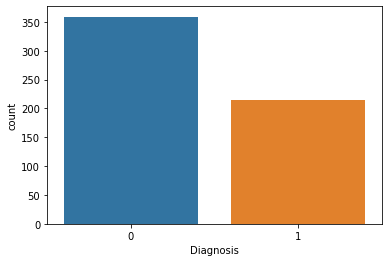

In [ ]:
sns.countplot(x='Diagnosis',data=df)

In [ ]:
df['Diagnosis'].value_counts()

0    359
1    214
Name: Diagnosis, dtype: int64

## Splitting the dataset into the training set and testing set

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.2, random_state = 1)

In [ ]:
print(X_train)

[[1.272e+01 1.378e+01 8.178e+01 ... 6.343e-02 2.369e-01 6.922e-02]
 [2.156e+01 2.239e+01 1.420e+02 ... 2.216e-01 2.060e-01 7.115e-02]
 [1.142e+01 2.038e+01 7.758e+01 ... 2.575e-01 6.638e-01 1.730e-01]
 ...
 [1.720e+01 2.452e+01 1.142e+02 ... 1.899e-01 3.313e-01 1.339e-01]
 [9.567e+00 1.591e+01 6.021e+01 ... 7.222e-02 2.757e-01 8.178e-02]
 [1.303e+01 1.842e+01 8.261e+01 ... 5.013e-02 1.987e-01 6.169e-02]]


In [ ]:
print(X_test)

[[1.955e+01 2.877e+01 1.336e+02 ... 1.941e-01 2.818e-01 1.005e-01]
 [1.553e+01 3.356e+01 1.037e+02 ... 2.014e-01 3.512e-01 1.204e-01]
 [1.152e+01 1.493e+01 7.387e+01 ... 9.608e-02 2.664e-01 7.809e-02]
 ...
 [1.281e+01 1.306e+01 8.129e+01 ... 3.990e-02 1.783e-01 7.319e-02]
 [1.573e+01 1.128e+01 1.028e+02 ... 1.452e-01 2.557e-01 8.181e-02]
 [1.387e+01 2.070e+01 8.977e+01 ... 6.845e-02 2.249e-01 8.492e-02]]


In [ ]:
print(y_train)

[0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 0 1 0 0 1
 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 1 0 1 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 1
 0 1 1 0 1 0 0 1 0 0 0 1 0 0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0
 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 1 1 1 1 0 1 1 0 0 1 1 0 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0
 0 0 1 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 1 1 1 0 1 0 1 1
 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0
 0 1 0 1 0 1 1 1 0 1 0 1 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 0 0 0 1
 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0]


In [ ]:
print(y_test)

[1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0
 0 0 1 0 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1
 0 0 0 0]


## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
print(X_train)

[[-0.41839778 -1.29628981 -0.43844772 ... -0.80520486 -0.8690422
  -0.84757328]
 [ 2.07761349  0.73437146  2.020682   ...  1.58656135 -1.37324052
  -0.73763309]
 [-0.78545826  0.26031465 -0.60995792 ...  2.12942287  6.09672676
   5.06413299]
 ...
 [ 0.84654911  1.23673018  0.88544776 ...  1.10721009  0.67129181
   2.83684724]
 [-1.30866062 -0.7939311  -1.31927515 ... -0.67228696 -0.23593882
  -0.13210758]
 [-0.33086797 -0.20194971 -0.40455403 ... -1.00632069 -1.49235533
  -1.27651092]]


In [ ]:
print(X_test)

[[ 1.51008152  2.23908911  1.67766158 ...  1.17072035 -0.13640452
   0.93425532]
 [ 0.37501757  3.36880659  0.45667224 ...  1.28110723  0.99600205
   2.06783553]
 [-0.75722284 -1.02506328 -0.76145861 ... -0.31148818 -0.38768783
  -0.34230411]
 ...
 [-0.3929859  -1.46610121 -0.45845724 ... -1.16101354 -1.82522412
  -0.62142688]
 [ 0.43148841 -1.88591272  0.41992005 ...  0.43127945 -0.56228077
  -0.13039866]
 [-0.09369043  0.33578638 -0.11216996 ... -0.72929498 -1.06484738
   0.04675885]]


## Training the model


In [ ]:
#Calling and training the model
from xgboost import XGBClassifier
classifier = XGBClassifier()
classifier.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#Predicting the results
y_pred = classifier.predict(X_test)


## Accuracy and confusion matrix

In [ ]:
#Accuracy on test set
from sklearn.metrics import accuracy_score
test_acc = accuracy_score(y_test,y_pred)
acc = test_acc * 100
print("Accuracy on test set = %0.3f"%acc)

Accuracy on test set = 93.913


In [ ]:
#Making confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[73  3]
 [ 4 35]]
